In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [102]:

# Générer les données
np.random.seed(0)  
n_observations = 1000

# variables explicatives
superficie = np.random.uniform(1, 50, n_observations)

wilayas = ['Hodh Chargui',
           'Hodh El Gharbi',
           'Assaba',
           'Gorgol',
           'Brakna',
           'Trarza', 
           'Adrar',
           'Dakhlet Nouadhibou',
           'Tagant', 
           'Guidimakha', 
           'Tiris Zemmour',
           'Inchiri',
           'Nouakchott',   
               ]  # Liste des wilayas
wilaya = np.random.choice(wilayas, n_observations)

produits = ['Blé', 'Maïs', 'Sorgho', 'Riz', 'Millet', 'Orge', 'Coton', 'Arachide', 
            'Tomate', 'Pastèque', 'Pomme de terre', 'Oignon', 'Ail', 'Fruit de palme', 'Patate douce']  # Produits cultivés

produit = np.random.choice(produits, n_observations)
travailleurs = np.random.randint(1, 31, n_observations)
capital = np.random.uniform(10, 500, n_observations)
humidite = np.random.uniform(10, 80, n_observations)
temperature = np.random.uniform(20, 45, n_observations)
precipitations = np.random.uniform(0, 100, n_observations)

#  variable de rendement en fonction des variables explicatives
rendement = 100 + 5*superficie + 2*travailleurs + 2*capital - 4*humidite + 0.5*temperature + 0.1*precipitations + np.random.normal(loc=0, scale=100, size=n_observations)


In [103]:
data = {
    'Superficie': superficie,
    'Wilaya': wilaya,
    'Produit': produit,
    'Travailleurs': travailleurs,
    'Capital': capital,
    'Humudite': humidite,
    'Temperature': temperature,
    'Precipitations': precipitations,
    'Rendement': rendement
}

In [104]:
df = pd.DataFrame(data)

In [87]:
df.head()

,Superficie,Wilaya,Produit,Travailleurs,Capital,Humudite,Temperature,Precipitations,Rendement
0,21.156954,Tagant,Millet,22,131.008378,16.319815,44.968728,43.486245,1148.091365
1,43.836487,Hodh Chargui,Coton,4,260.847220,75.968214,37.792027,68.533386,1632.779862
2,14.122675,Nouakchott,Sorgho,2,434.673407,11.729449,38.742772,8.701610,1864.720776
3,6.663449,Assaba,Pomme de terre,11,28.709733,13.691365,24.045879,36.483702,1197.984991
4,40.308858,Adrar,Patate douce,25,449.850554,19.682447,20.053216,83.490319,2017.237862


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Superficie,1000.0,26.130421,14.319841,1.003611,14.160878,26.881728,38.685754,49.927802
Travailleurs,1000.0,15.494000,8.920288,1.000000,8.000000,15.000000,23.000000,30.000000
Capital,1000.0,247.940747,138.123890,10.961028,129.938381,250.224221,367.019146,498.703304
Humudite,1000.0,44.483946,20.392112,10.034367,26.481291,44.038050,62.716599,79.996963
Temperature,1000.0,32.241941,7.122506,20.021273,25.781429,32.227991,38.234900,44.986956
Precipitations,1000.0,49.430703,29.707191,0.015038,22.201366,49.879927,74.862288,99.970838
Rendement,1000.0,551.237652,254.823898,100.018025,336.907280,556.273809,760.596844,999.854627


In [88]:
categ = df.select_dtypes(exclude=['int', 'float'])
categ.astype('object').describe().T

,count,unique,top,freq
Wilaya,1000,13,Assaba,89
Produit,1000,15,Patate douce,84


In [105]:
#df[categ] = df[categ].apply(pd.to_numeric, errors='coerce')
df_numeric = df.drop(categ, axis=1)

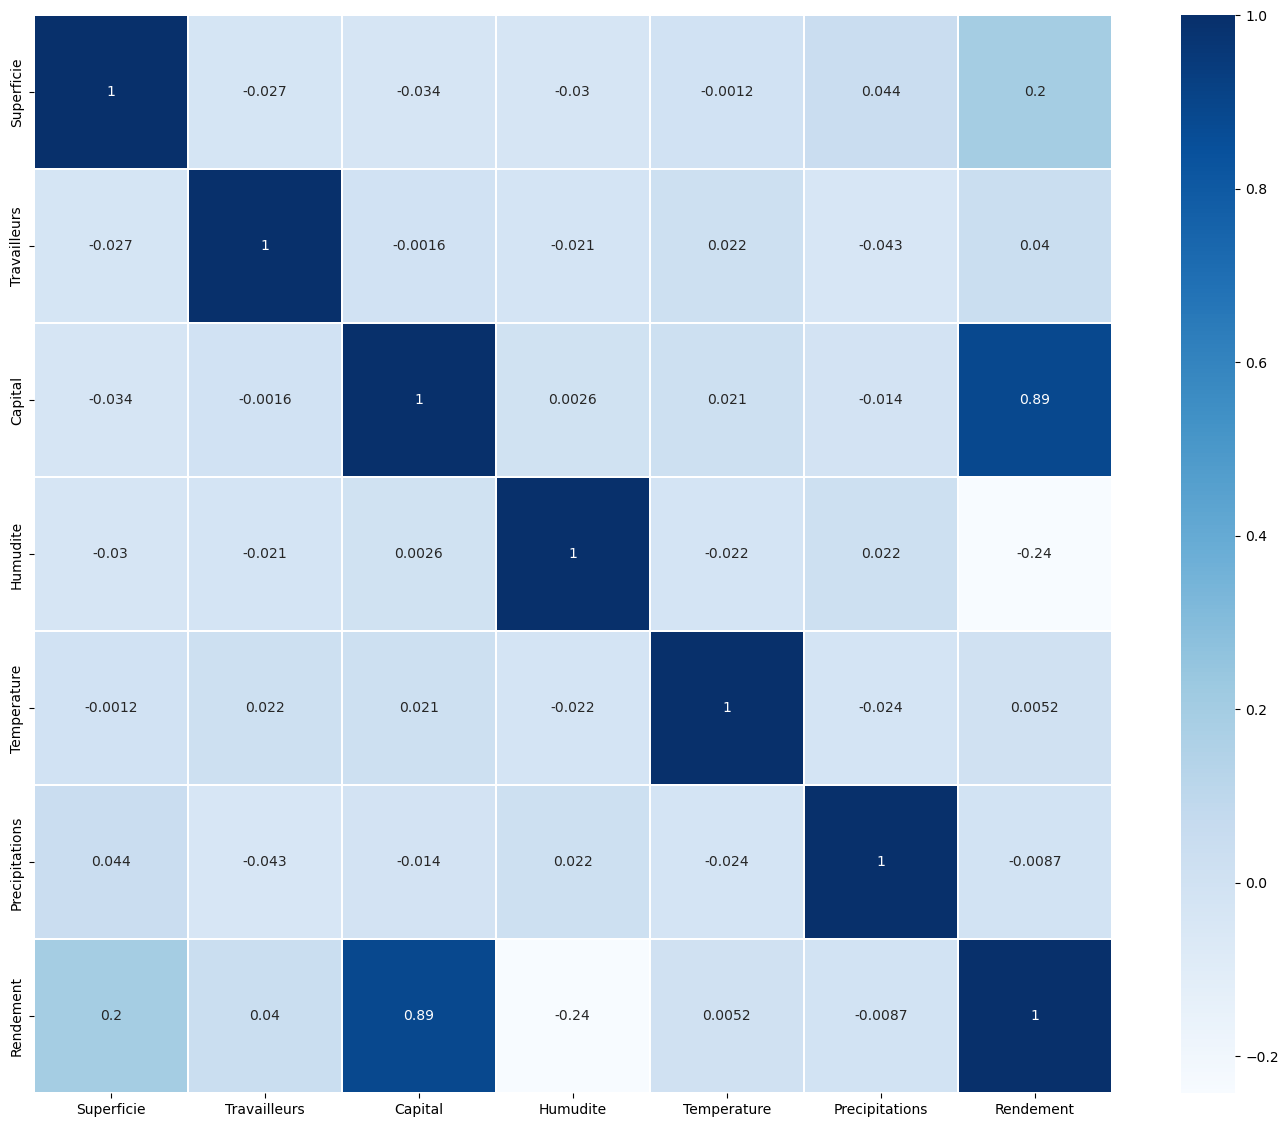

In [106]:
plt.figure(figsize=(18, 14))
sns.heatmap(df_numeric.corr( ),
cmap="Blues",
linewidths=0.1,
vmax=1.0,linecolor='white',
annot = True,
square = True)
plt.show()

In [107]:
print("Separating labels from features...")

features_list = ['Superficie',
    'Wilaya',
    'Produit',
    'Travailleurs',
    'Capital',
    'Humudite',
    'Temperature',
    'Precipitations']

target_variable = 'Rendement'

X = df.loc[:,features_list]
Y = df.loc[:,target_variable]

print("...Done.")
print()

Separating labels from features...
...Done.



In [108]:
X = pd.get_dummies(X, drop_first = True) 
X.head()

,Superficie,Travailleurs,Capital,Humudite,Temperature,Precipitations,Wilaya_Assaba,Wilaya_Brakna,Wilaya_Dakhlet Nouadhibou,Wilaya_Gorgol,...,Produit_Maïs,Produit_Millet,Produit_Oignon,Produit_Orge,Produit_Pastèque,Produit_Patate douce,Produit_Pomme de terre,Produit_Riz,Produit_Sorgho,Produit_Tomate
0,27.891862,22,112.959206,16.139187,20.487196,70.699625,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,36.044279,6,37.622053,40.621211,32.385185,59.563838,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30.535405,15,417.241088,43.108568,20.330576,40.510928,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,27.699276,20,17.450603,47.235846,26.354793,6.133801,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,21.759085,27,121.320934,32.818149,42.988050,3.098617,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [109]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [110]:
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [111]:
import statsmodels.api as sm
# Fit du modèle linéaire
lr_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

#  tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,613.513004,3.661286,167.567627,0.000000e+00,606.325673,620.700334
x1,72.388468,3.750811,19.299419,5.954800e-68,65.025396,79.751541
x2,15.346668,3.721927,4.123313,4.142234e-05,8.040297,22.653040
x3,288.306906,3.689201,78.148867,0.000000e+00,281.064776,295.549036
x4,-77.689177,3.787222,-20.513499,6.889043e-75,-85.123728,-70.254626
x5,-9.146816,3.723768,-2.456333,1.425690e-02,-16.456803,-1.836829
x6,-1.137207,3.702287,-0.307163,7.588025e-01,-8.405024,6.130611
x7,-5.189804,5.012591,-1.035354,3.008301e-01,-15.029830,4.650221
x8,-2.000325,4.991398,-0.400754,6.887125e-01,-11.798747,7.798097
x9,-8.533710,5.089098,-1.676861,9.397716e-02,-18.523924,1.456504


In [112]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.898
1,Dependent Variable:,Rendement,AIC:,9723.5006
2,Date:,2024-02-14 13:09,BIC:,9878.0928
3,No. Observations:,800,Log-Likelihood:,-4828.8
4,Df Model:,32,F-statistic:,222.0
5,Df Residuals:,767,Prob (F-statistic):,0.00
6,R-squared:,0.903,Scale:,10680.
